In [2]:
import numpy as np
import os
import torch
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn
!pip install torchinfo
!pip install torchmetrics
from torchinfo import summary
from torchmetrics import Accuracy



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [3]:
# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# If CUDA is available, print the CUDA device name
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))

Using device: cuda
Tesla T4


ToTensor() transform is used to convert the input images from a PIL Image format (which is how the MNIST dataset is initially loaded) into a PyTorch Tensor. This is necessary because PyTorch models work with tensors. ToTensor() also scales the pixel values of the images to be between 0.0 and 1.0, which is a common practice for image normalization and can improve model performance

In [4]:
# Load the training and test datasets
train_dataset = mnist.MNIST(root='./data', train=True, download=True, transform=ToTensor())
test_dataset = mnist.MNIST(root='./data', train=False, download=True, transform=ToTensor())

# Print the size of the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.95MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.31MB/s]

Training dataset size: 60000
Test dataset size: 10000


In [7]:
class_names =train_dataset.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
# Create DataLoader for training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print the number of batches in each DataLoader
print(f"Number of batches in training loader: {len(train_loader)}")
print(f"Number of batches in test loader: {len(test_loader)}")

Number of batches in training loader: 938
Number of batches in test loader: 157


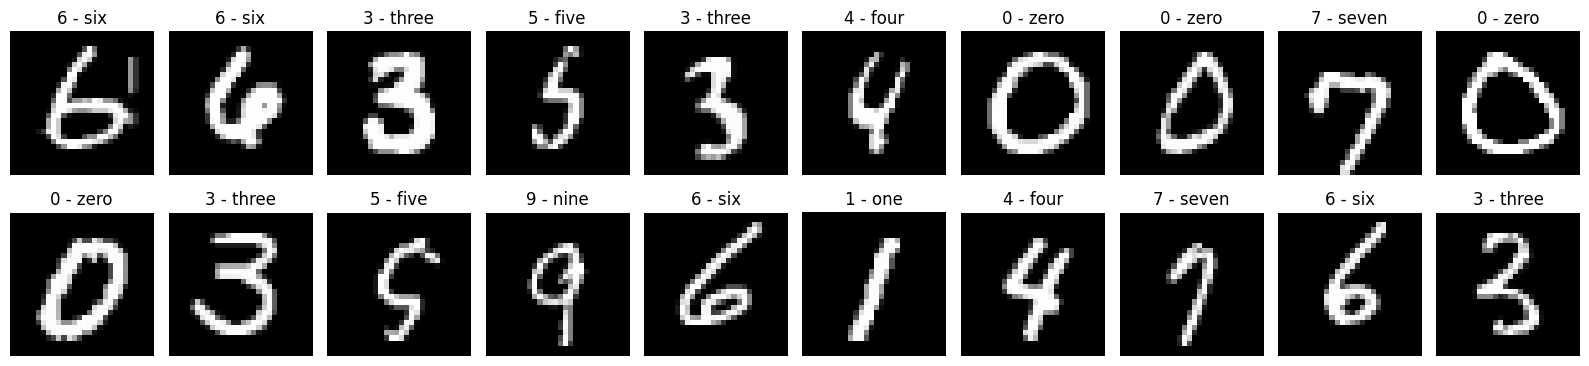

In [9]:
fig = plt.figure(figsize=(16, 4))
rows, cols = 2, 10

for i in range(1, (rows*cols) + 1):
    rand_ind = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[rand_ind]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"{class_names[label]}")
    plt.axis(False)
    plt.tight_layout()

In [10]:
import numpy as np

def img_pixel_superimpose(img, ax):
    w, h = img.shape
    color_map = plt.cm.get_cmap('gray_r')  # gray_reversed
    ax.imshow(img, cmap='gray')
    for x in range(w):
        for y in range(h):
            color = color_map(img[x][y])
            ax.annotate(str(img[x][y]), xy=(y,x), horizontalalignment='center', verticalalignment='center',
                        color=color)
            plt.axis(False)

/tmp/ipython-input-10-1572773032.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('gray_r')  # gray_reversed


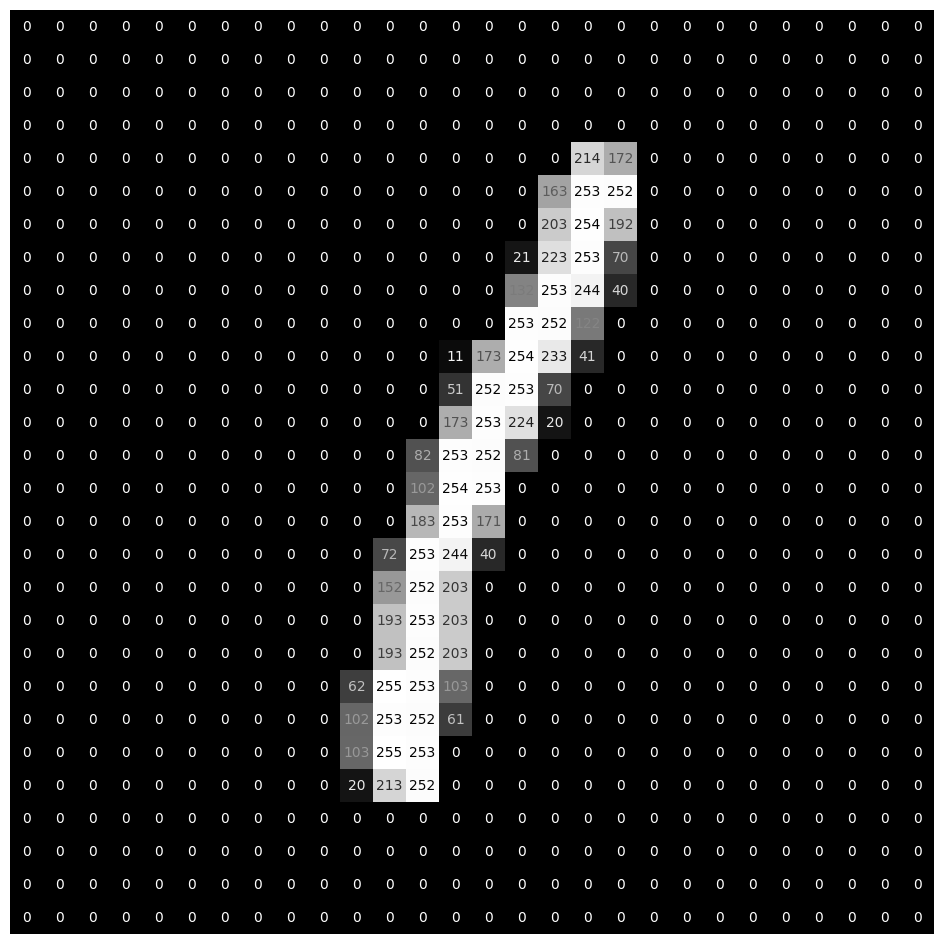

In [11]:
fig = plt.figure(figsize = (12,12))
ax0 = fig.add_subplot(1, 1, 1)

rand_ind = torch.randint(0, len(train_loader), size=[1]).item()

img0 = train_loader.dataset.data[rand_ind]
img0 = img0.numpy()
img_pixel_superimpose(img0, ax0)

Normalize them with their mean and std so that our loss function converges fast

In [12]:
# Calculate mean and standard deviation of the training dataset
# We need to iterate through the dataset to calculate this
# MNIST images are 28x28 and grayscale (1 channel)

# Initialize variables
mean = 0.0
std = 0.0
total_samples = 0

# Iterate through the training dataset
for images, _ in train_loader:
    # Reshape images to (batch_size, num_pixels) and convert to float
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1) * images.size(2) * images.size(3)).float()

    # Update mean and variance (for standard deviation)
    mean += images.mean(1).sum()
    std += images.std(1).sum()
    total_samples += batch_samples

# Calculate the overall mean and standard deviation
mean /= total_samples
std /= total_samples

print(f"Mean of the training dataset: {mean.item():.4f}")
print(f"Standard deviation of the training dataset: {std.item():.4f}")

Mean of the training dataset: 0.1307
Standard deviation of the training dataset: 0.3015


In [13]:
from torchvision import transforms

# Define the normalization transform using the calculated mean and standard deviation
normalize_transform = transforms.Normalize(mean=(mean.item(),), std=(std.item(),))

# Compose the ToTensor transform and the normalization transform
composed_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize_transform
])

# Update the datasets to use the composed transform
train_dataset.transform = composed_transform
test_dataset.transform = composed_transform

print("Datasets updated with composed transform (ToTensor and Normalize).")

Datasets updated with composed transform (ToTensor and Normalize).


In [14]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

Now to feed these datasets into our model we need to create data-loaders

In [16]:
from torch.utils.data import DataLoader

# Create DataLoader for training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False) # Assuming val_dataset exists
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print the number of batches in each DataLoader
print(f"Number of batches in training loader: {len(train_loader)}")
print(f"Number of batches in validation loader: {len(val_loader)}")
print(f"Number of batches in test loader: {len(test_loader)}")

Number of batches in training loader: 750
Number of batches in validation loader: 188
Number of batches in test loader: 157


In [17]:
from torch.utils.data import random_split

# Define the split ratio (e.g., 80% training, 20% validation)
train_ratio = 0.8
val_ratio = 0.2

# Calculate the number of samples for each split
total_train_samples = len(train_dataset)
num_train = int(total_train_samples * train_ratio)
num_val = total_train_samples - num_train # Ensure the total adds up

# Split the training dataset
train_dataset, val_dataset = random_split(train_dataset, [num_train, num_val])


print(f"Original training dataset split into new training set ({len(train_dataset)} samples) and validation set ({len(val_dataset)} samples).")
print(f"Number of batches in validation loader: {len(val_loader)}")

Original training dataset split into new training set (38400 samples) and validation set (9600 samples).
Number of batches in validation loader: 188


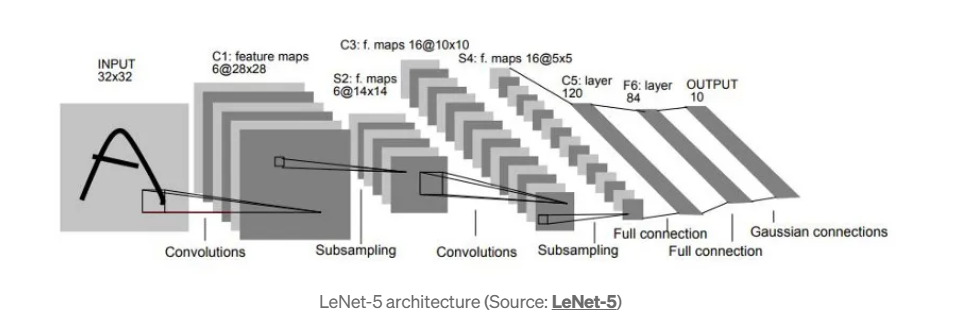

In [1]:
class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            #1
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),   # 28*28->32*32-->28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14

            #2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5

        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )

    def forward(self, x):
        return self.classifier(self.feature(x))

NameError: name 'nn' is not defined

In [ ]:
# Create an instance of the LeNet5V1 model
model_lenet5v1 = LeNet5V1()

summary(model=model_lenet5v1, input_size=(1, 1, 28, 28), col_width=20,
                  col_names=['input_size', 'output_size', 'num_params', 'trainable'], row_settings=['var_names'], verbose=0)

In [ ]:
import torch.optim as optim

criterion  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_lenet5v1.parameters(), lr=0.001)
accuracy = Accuracy(task='multiclass', num_classes=10)

In [ ]:
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train() # Set the model to training mode
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

In [ ]:
def evaluate_model(model, val_loader, criterion, device):
    model.eval() # Set the model to evaluation mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad(): # Disable gradient calculation during evaluation
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(val_loader)
    epoch_accuracy = correct_predictions / total_samples

    print(f'Validation Loss: {epoch_loss:.3f}, Validation Accuracy: {epoch_accuracy:.3f}')
    return epoch_loss, epoch_accuracy

In [ ]:
# Main training loop
num_epochs = 12

print("Starting training...")
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Train for one epoch
    train_one_epoch(model_lenet5v1, train_loader, criterion, optimizer, device)

    # Evaluate on the validation set
    evaluate_model(model_lenet5v1, val_loader, criterion, device)

print("Finished Training")

Starting training...
Epoch 1/12
[100] loss: 0.881
[200] loss: 0.303
[300] loss: 0.242
[400] loss: 0.192
[500] loss: 0.154
[600] loss: 0.132
[700] loss: 0.120
Validation Loss: 0.103, Validation Accuracy: 0.969
Epoch 2/12
[100] loss: 0.096
[200] loss: 0.082
[300] loss: 0.070
[400] loss: 0.074
[500] loss: 0.080
[600] loss: 0.068
[700] loss: 0.062
Validation Loss: 0.068, Validation Accuracy: 0.978
Epoch 3/12
[100] loss: 0.051
[200] loss: 0.065
[300] loss: 0.051
[400] loss: 0.046
[500] loss: 0.046
[600] loss: 0.052
[700] loss: 0.049
Validation Loss: 0.057, Validation Accuracy: 0.983
Epoch 4/12
[100] loss: 0.039
[200] loss: 0.047
[300] loss: 0.050
[400] loss: 0.039
[500] loss: 0.035
[600] loss: 0.041
[700] loss: 0.032
Validation Loss: 0.060, Validation Accuracy: 0.983
Epoch 5/12
[100] loss: 0.031
[200] loss: 0.036
[300] loss: 0.029
[400] loss: 0.025
[500] loss: 0.039
[600] loss: 0.041
[700] loss: 0.032
Validation Loss: 0.056, Validation Accuracy: 0.983
Epoch 6/12
[100] loss: 0.029
[200] loss

In [ ]:
# Define a path to save the model
model_save_path = 'lenet5_mnist_model.pth'

# Save the model's state dictionary
torch.save(model_lenet5v1.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to lenet5_mnist_model.pth


In [ ]:
print("Evaluating the model on the test dataset...")
test_loss, test_accuracy = evaluate_model(model_lenet5v1, test_loader, criterion, device)

print(f"\nTest Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.3f}")

Evaluating the model on the test dataset...
Validation Loss: 0.042, Validation Accuracy: 0.987

Test Loss: 0.042, Test Accuracy: 0.987


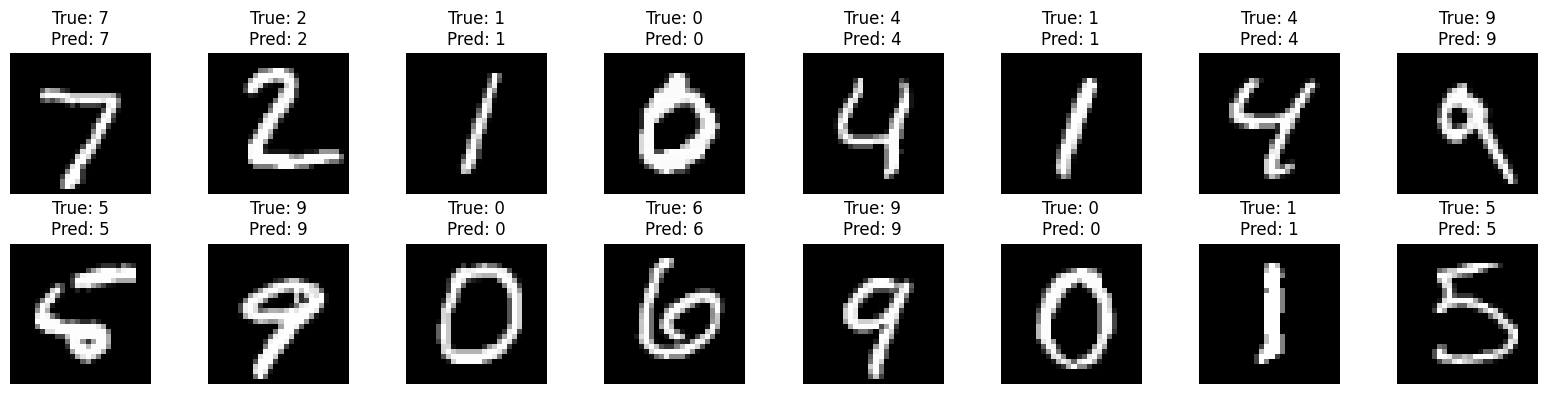

In [ ]:
import matplotlib.pyplot as plt
import torch

# Set the model to evaluation mode
model_lenet5v1.eval()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Move images and labels to the same device as the model
images, labels = images.to(device), labels.to(device)

# Get predictions
with torch.no_grad():
    outputs = model_lenet5v1(images)
    _, predicted = torch.max(outputs.data, 1)

# Display images and predictions
fig = plt.figure(figsize=(16, 4))
rows, cols = 2, 8 # Display up to 16 images from the batch

for i in range(min(len(images), rows * cols)):
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(images[i].cpu().squeeze(), cmap='gray') # Move back to CPU for plotting
    plt.title(f"True: {labels[i].item()}\nPred: {predicted[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()